### Module Import

In [162]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

### Load Image

In [163]:
file = "./lena_raw_512x512.raw"
file_ID = open(file, "rb")
img_Lena = np.fromfile(file_ID, dtype = 'uint8', sep = "")
img_Lena = np.reshape(img_Lena, [512, 512])

file = "./BOAT512.raw"
file_ID = open(file, "rb")
img_Boat = np.fromfile(file_ID, dtype = 'uint8', sep = "")
img_Boat = np.reshape(img_Boat, [512, 512])

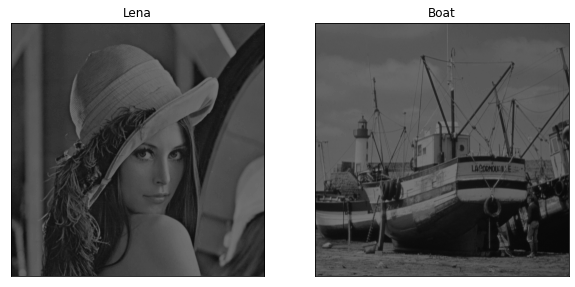

In [164]:
fig = plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(img_Lena, cmap='gray', vmin=0, vmax=500)
plt.title('Lena')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img_Boat, cmap='gray', vmin=0, vmax=500)
plt.title('Boat')
plt.xticks([])
plt.yticks([])

plt.show()

### DCT

#### 8x8 Forward DCT

In [165]:
def forwardDCT_1D(img_block):
    block_size = img_block.shape[0]
    pi = 3.141592653589793238

    result_array = []

    for u in range(block_size):
        if u == 0:
            k_u = 1 / math.sqrt(block_size)
        else:
            k_u = math.sqrt(2/block_size)
            
        sum = 0.0
        for x in range(block_size):
            sum = sum + (img_block[x] * math.cos((2*x + 1) * u * pi / (2 * block_size)))
        
        result = k_u * sum
        result_array.append(result)
    
    result_array = np.array(result_array, dtype='int')

    return result_array


In [166]:
def inverseDCT_1D(img_block):
    block_size = img_block.shape[0]
    pi = 3.141592653589793238

    result_array = []

    for x in range(block_size):
        result = 0.0

        for u in range(block_size):
            if u == 0:
                k_u = 1 / math.sqrt(block_size)
            else:
                k_u = math.sqrt(2/block_size)
            result = result + (k_u * img_block[u] * math.cos((2*x + 1) * u * pi / (2 * block_size)))

        result_array.append(result)
    
    result_array = np.array(result_array, dtype='int')

    return result_array

In [167]:
def forwardDCT_2D(img_block):
    row, col = img_block.shape

    result_Array_vert = np.zeros(shape = (row, col))
    for i in range(row):
        result_Array_vert[i, :] = forwardDCT_1D(img_block[i])

    result_Array_horiz = result_Array_vert.T
    for i in range(col):
        result_Array_horiz[i, :] = forwardDCT_1D(result_Array_horiz[i])

    return result_Array_horiz

In [168]:
def inverseDCT_2D(img_block):
    row, col = img_block.shape

    result_Array_vert = np.zeros(shape = (row, col))
    for i in range(row):
        result_Array_vert[i, :] = inverseDCT_1D(img_block[i])

    result_Array_horiz = result_Array_vert.T
    for i in range(col):
        result_Array_horiz[i, :] = inverseDCT_1D(result_Array_horiz[i])

    return result_Array_horiz

### MSE

In [169]:
def getMSE(img, img_Compare):
    row, col = img.shape

    sum = 0
    for i in range(row):
        for j in range(col):
            diff = img[i, j] - img_Compare[i, j]
            diff_Pow = math.pow(diff, 2)
            sum = sum + diff_Pow
    
    MSE = sum / (row * col)
    return MSE            

### Test_Lena

#### Forward DCT

In [170]:
row, col = img_Lena.shape
img_Forward_DCT_Lena = np.zeros(shape = (row, col))
block_size = 8

for i in range(0, row, block_size):
    for j in range(0, col, block_size):
        block = img_Lena[i:i+block_size, j:j+block_size]
        block_DCT = forwardDCT_2D(block)
        img_Forward_DCT_Lena[i:i+block_size, j:j+block_size] = block_DCT

#### Inverse DCT

In [171]:
row, col = img_Forward_DCT_Lena.shape
img_Inverse_DCT_Lena = np.zeros(shape = (row, col))
block_size = 8

for i in range(0, row, block_size):
    for j in range(0, col, block_size):
        block = img_Forward_DCT_Lena[i:i+block_size, j:j+block_size]
        block_DCT = inverseDCT_2D(block)
        img_Inverse_DCT_Lena[i:i+block_size, j:j+block_size] = block_DCT

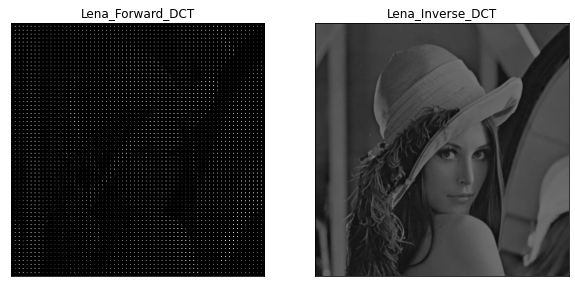

In [172]:
fig = plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(img_Forward_DCT_Lena, cmap='gray', vmin=0, vmax=500)
plt.title('Lena_Forward_DCT')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img_Inverse_DCT_Lena, cmap='gray', vmin=0, vmax=500)
plt.title('Lena_Inverse_DCT')
plt.xticks([])
plt.yticks([])

plt.show()

### Test_Boat

#### Forward DCT

In [173]:
row, col = img_Boat.shape
img_Forward_DCT_Boat = np.zeros(shape = (row, col))
block_size = 8

for i in range(0, row, block_size):
    for j in range(0, col, block_size):
        block = img_Boat[i:i+block_size, j:j+block_size]
        block_DCT = forwardDCT_2D(block)
        img_Forward_DCT_Boat[i:i+block_size, j:j+block_size] = block_DCT

#### Inverse DCT

In [174]:
row, col = img_Forward_DCT_Boat.shape
img_Inverse_DCT_Boat = np.zeros(shape = (row, col))
block_size = 8

for i in range(0, row, block_size):
    for j in range(0, col, block_size):
        block = img_Forward_DCT_Boat[i:i+block_size, j:j+block_size]
        block_DCT = inverseDCT_2D(block)
        img_Inverse_DCT_Boat[i:i+block_size, j:j+block_size] = block_DCT

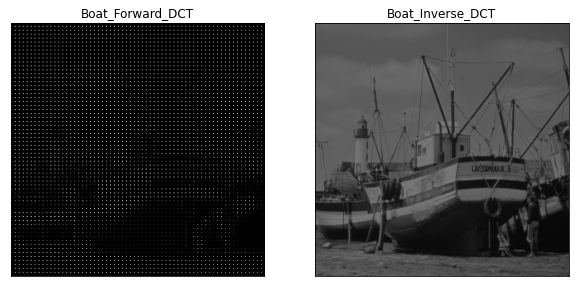

In [175]:
fig = plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(img_Forward_DCT_Boat, cmap='gray', vmin=0, vmax=500)
plt.title('Boat_Forward_DCT')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img_Inverse_DCT_Boat, cmap='gray', vmin=0, vmax=500)
plt.title('Boat_Inverse_DCT')
plt.xticks([])
plt.yticks([])

plt.show()

### Result_MSE

In [176]:
MSE_Lena = round(getMSE(img_Lena, img_Inverse_DCT_Lena), 3)
MSE_Boat = round(getMSE(img_Boat, img_Inverse_DCT_Boat), 3)

In [177]:
print("*========= MSE =========*")
print("  1. Lena's MSE: ", MSE_Lena)
print("  2. Boat's MSE: ", MSE_Boat)

*========= MSE =========*
  1. Lena's MSE:  2.497
  2. Boat's MSE:  2.463


### Save iamge

In [178]:
temp_Lena = img_Forward_DCT_Lena / img_Forward_DCT_Lena.max() * 255
temp_Lena = temp_Lena.clip(0).astype(dtype = 'uint8')
save_img_Forward_DCT_Lena = Image.fromarray(temp_Lena)
save_img_Inverse_DCT_Lena = Image.fromarray(img_Inverse_DCT_Lena.astype(dtype = 'uint8'))

temp_Boat = img_Forward_DCT_Boat / img_Forward_DCT_Boat.max() * 255
temp_Boat = temp_Boat.clip(0).astype(dtype = 'uint8')
save_img_Forward_DCT_Boat = Image.fromarray(temp_Boat)
save_img_Inverse_DCT_Boat = Image.fromarray(img_Inverse_DCT_Boat.astype(dtype = 'uint8'))

dir_path = "./Result"
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

save_img_Forward_DCT_Lena.save("./Result/result_DCT_Lena.bmp", 'BMP')
save_img_Inverse_DCT_Lena.save("./Result/result_DCT_Inverse_Lena.bmp", 'BMP')

save_img_Forward_DCT_Boat.save("./Result/result_DCT_Boat.bmp", 'BMP')
save_img_Inverse_DCT_Boat.save("./Result/result_DCT_Inverse_Boat.bmp", 'BMP')

### 실험실

In [183]:
def forwardDCT_2D_1pix(img_block):
    row, col = img_block.shape

    result_Array_vert = np.zeros(shape = (row, col))
    for i in range(row):
        result_Array_vert[i, :] = forwardDCT_1D(img_block[i])

    result_Array_horiz = result_Array_vert.T
    for i in range(col):
        result_Array_horiz[i, :] = forwardDCT_1D(result_Array_horiz[i])

    result = np.zeros(shape = (row, col))
    result[0, 0] = result_Array_horiz[0, 0]
    return result

In [184]:
row, col = img_Boat.shape
img_Forward_DCT_Boat_1px = np.zeros(shape = (row, col))
img_Forward_DCT_Lena_1px = np.zeros(shape = (row, col))
block_size = 8

for i in range(0, row, block_size):
    for j in range(0, col, block_size):
        block = img_Lena[i:i+block_size, j:j+block_size]
        block_DCT = forwardDCT_2D_1pix(block)
        img_Forward_DCT_Lena_1px[i:i+block_size, j:j+block_size] = block_DCT

        block = img_Boat[i:i+block_size, j:j+block_size]
        block_DCT = forwardDCT_2D_1pix(block)
        img_Forward_DCT_Boat_1px[i:i+block_size, j:j+block_size] = block_DCT

In [187]:
row, col = img_Forward_DCT_Boat_1px.shape
img_Inverse_DCT_Lena_1px = np.zeros(shape = (row, col))
img_Inverse_DCT_Boat_1px = np.zeros(shape = (row, col))

block_size = 8

for i in range(0, row, block_size):
    for j in range(0, col, block_size):
        block = img_Forward_DCT_Lena_1px[i:i+block_size, j:j+block_size]
        block_DCT = inverseDCT_2D(block)
        img_Inverse_DCT_Lena_1px[i:i+block_size, j:j+block_size] = block_DCT

        block = img_Forward_DCT_Boat_1px[i:i+block_size, j:j+block_size]
        block_DCT = inverseDCT_2D(block)
        img_Inverse_DCT_Boat_1px[i:i+block_size, j:j+block_size] = block_DCT

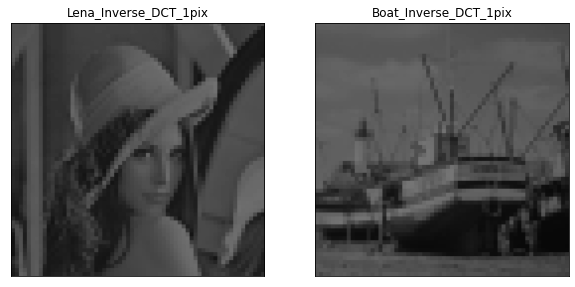

In [188]:
fig = plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(img_Inverse_DCT_Lena_1px, cmap='gray', vmin=0, vmax=500)
plt.title('Lena_Inverse_DCT_1px')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img_Inverse_DCT_Boat_1px, cmap='gray', vmin=0, vmax=500)
plt.title('Boat_Inverse_DCT_1px')
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
save_img_Inverse_DCT_Lena_1px = Image.fromarray(img_Inverse_DCT_Lena_1px.astype(dtype = 'uint8'))
save_img_Inverse_DCT_Boat_1px = Image.fromarray(img_Inverse_DCT_Boat_1px.astype(dtype = 'uint8'))

dir_path = "./Result"
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

save_img_Inverse_DCT_Lena_1px.save("./Result/result_DCT_Inverse_Lena_1px.bmp", 'BMP')
save_img_Inverse_DCT_Boat_1px.save("./Result/result_DCT_Inverse_Boat_1px.bmp", 'BMP')